## Quantum Teleportation

Quantum teleportation is a communication protocol based on the principles of quantum physics. This protocol utilises the properties of quantum mechanics, such as the uncertainty principle and the fact that the quantum state changes during measurement or transmission, to transmit a quantum state over long distances. This transmission takes place as an information transfer of a particle from one place to another, without physical transport.

The quantum teleportation protocol is usually realised between three qubits. These three qubits consist of a sending (Alice) qubit, a receiving (Bob) qubit and an entangled qubit. The sender qubit carries the quantum state to be teleported. The entangled qubit has a special relationship between the sender and receiver qubits that allows the quantum state to be transferred.

The protocol usually involves the following steps:

The sender (Alice) measures the quantum state it wants to send by interacting with the qubit.
The sender transmits the classical information obtained as a result of the measurements to the receiver (Bob).
The receiver, using the classical information it receives, makes a measurement with the cluster qubit under its control and receives the state of the sender qubit as a result of this measurement.
Quantum teleportation plays an important role in quantum information processing and quantum communication. It has application potential in areas such as cryptography, quantum computing and quantum communication.

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

%matplotlib inline

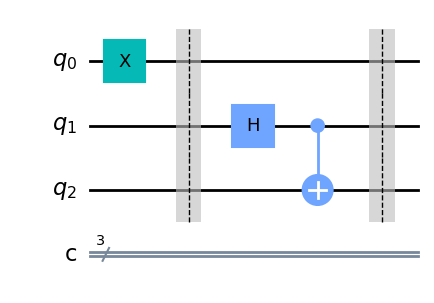

In [3]:
# Firstly, we built a quantum circuit, which contains 3 quantum units and 3 classical units.

circuit=QuantumCircuit(3,3)


# In the first step, we prepared the first unit, assigned it the value "0", and then added a barrier to keep it organised by separating the operations from each other

circuit.x(0)
circuit.barrier()


# In the second step, we did something to the second unit. We put it in an indeterminate state; it had both "0" and "1" possibilities. We used a Hadamard gate to do this.

circuit.h(1)


# In the third step, we established a communication between the second unit and the third unit. We established some kind of relationship and transferred the state of the second unit to the third unit. We used a CNOT gate to do this.

circuit.cx(1,2)


# We added one more barrier and clearly visualised what we had done, so that we could see how the quantum circuit we had created was progressing step by step.

circuit.barrier()
circuit.draw(output='mpl')

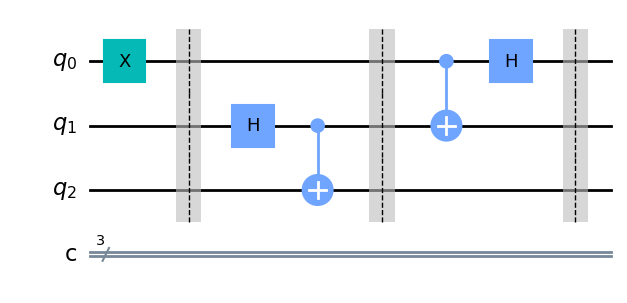

In [4]:
# In this step, we perform an operation on the qubits using a CNOT gate. Qubit 0 controls qubit 1. This represents a step in the quantum teleportation protocol for data transfer.

circuit.cx(0,1)


# Here, we apply the Hadamard gate to qubit 0. This gate puts the qubit in an indeterminate state, i.e. it creates a superposition between the states "0" and "1".

circuit.h(0)


# We added one more barrier and clearly visualised what we had done, so that we could see how the quantum circuit we had created was progressing step by step.

circuit.barrier()
circuit.draw(output='mpl')

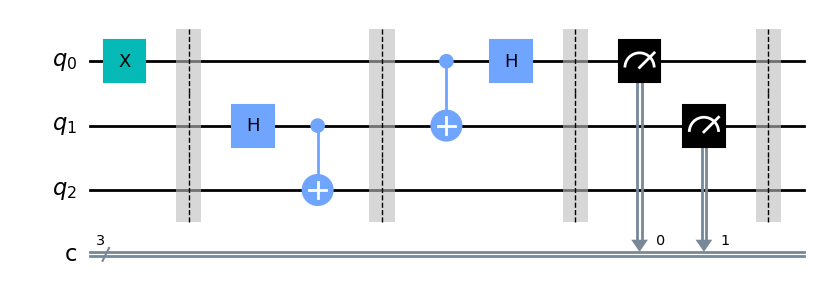

In [5]:
# In this step, we measure qubits 0 and 1 and record the results in the classical bits 0 and 1. That is, we translate the state of qubits 0 and 1 into classical bits.

circuit.measure([0,1],(0,1))


# We added one more barrier and clearly visualised what we had done, so that we could see how the quantum circuit we had created was progressing step by step.

circuit.barrier()
circuit.draw(output='mpl')

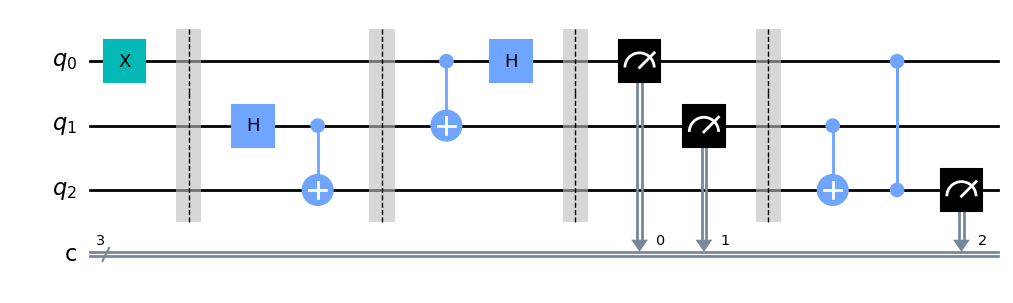

In [6]:
# We control qubit 1 using a CNOT gate and apply it to qubit 2.

circuit.cx(1,2)


# We control qubit 0 using a CZ (Controlled-Z) gate and apply it to qubit 2. This is the last step of the quantum teleportation protocol
circuit.cz(0,2)


# In the circuit, we measure the qubit number 2 and record the result in the classical bit number 2. 

circuit.measure([2],[2])


circuit.draw(output='mpl')

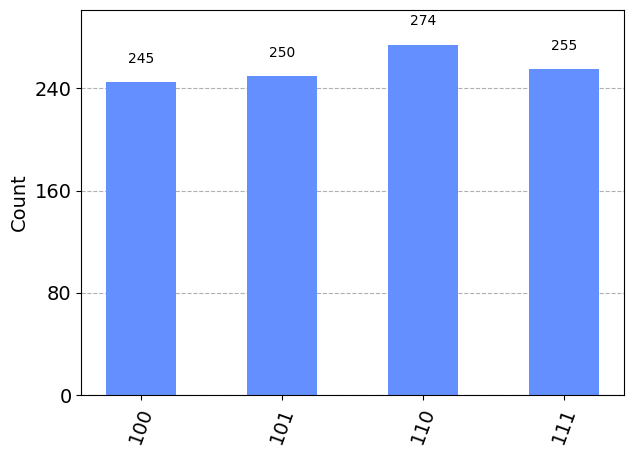

In [9]:
simulator= Aer.get_backend('qasm_simulator')
result=execute(circuit, backend=simulator, shots=1024).result()
plot_histogram(result.get_counts(circuit))